<a href="https://colab.research.google.com/github/chloepham57/housing/blob/main/Linear_Regression_Housing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:

housing= pd.read_csv ("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:

print (housing.isna().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64


In [ ]:

housing= housing.bfill()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [ ]:

ocean_proximity = LabelEncoder()
housing['ocean_proximity'] = ocean_proximity.fit_transform(housing['ocean_proximity'])
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [ ]:
housing.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [ ]:
plt.rc ("figure", figsize=(12,12))

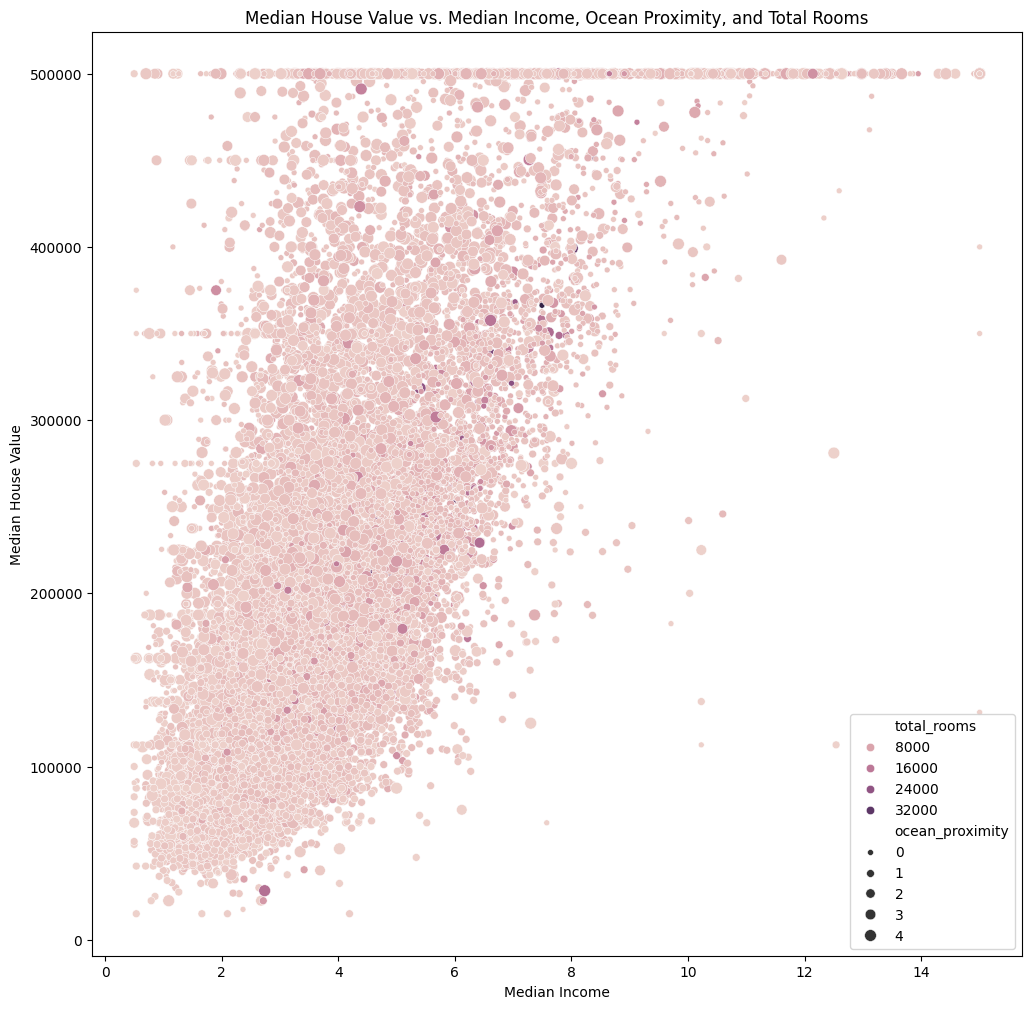

In [ ]:
#2d
sns.scatterplot(data= housing, x="median_income", y="median_house_value", size ='ocean_proximity', hue= "total_rooms")
plt.xlabel('Median Income')
plt.ylabel("Median House Value")
plt.title ("Median House Value vs. Median Income, Ocean Proximity, and Total Rooms")
plt.legend()

In [ ]:

housing= housing [["longitude", "latitude", "housing_median_age", "total_rooms", "ocean_proximity","total_bedrooms","population", "households", "median_income", "median_house_value"]]
correlation_matrix= housing.corr ()
print (correlation_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
ocean_proximity     -0.289779  0.200974            0.112468    -0.015693   
total_bedrooms       0.069763 -0.067344           -0.318956     0.924855   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    ocean_proximity  total_bedrooms  population  households  \
longitude                 -0.289779        0.069763    0.099773    0.055310   
latit

In [ ]:

X=housing[["median_income"]]
y=housing[["median_house_value"]]

In [ ]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
model = LinearRegression().fit(X_train, y_train)
y_predicted = model.predict(X_test)
y_model_train = model.predict(X_train)

In [ ]:

r_squared=r2_score(y_test, y_predicted)
print(f"R_squared is: {r_squared}")

R_squared is: 0.4985453110834851


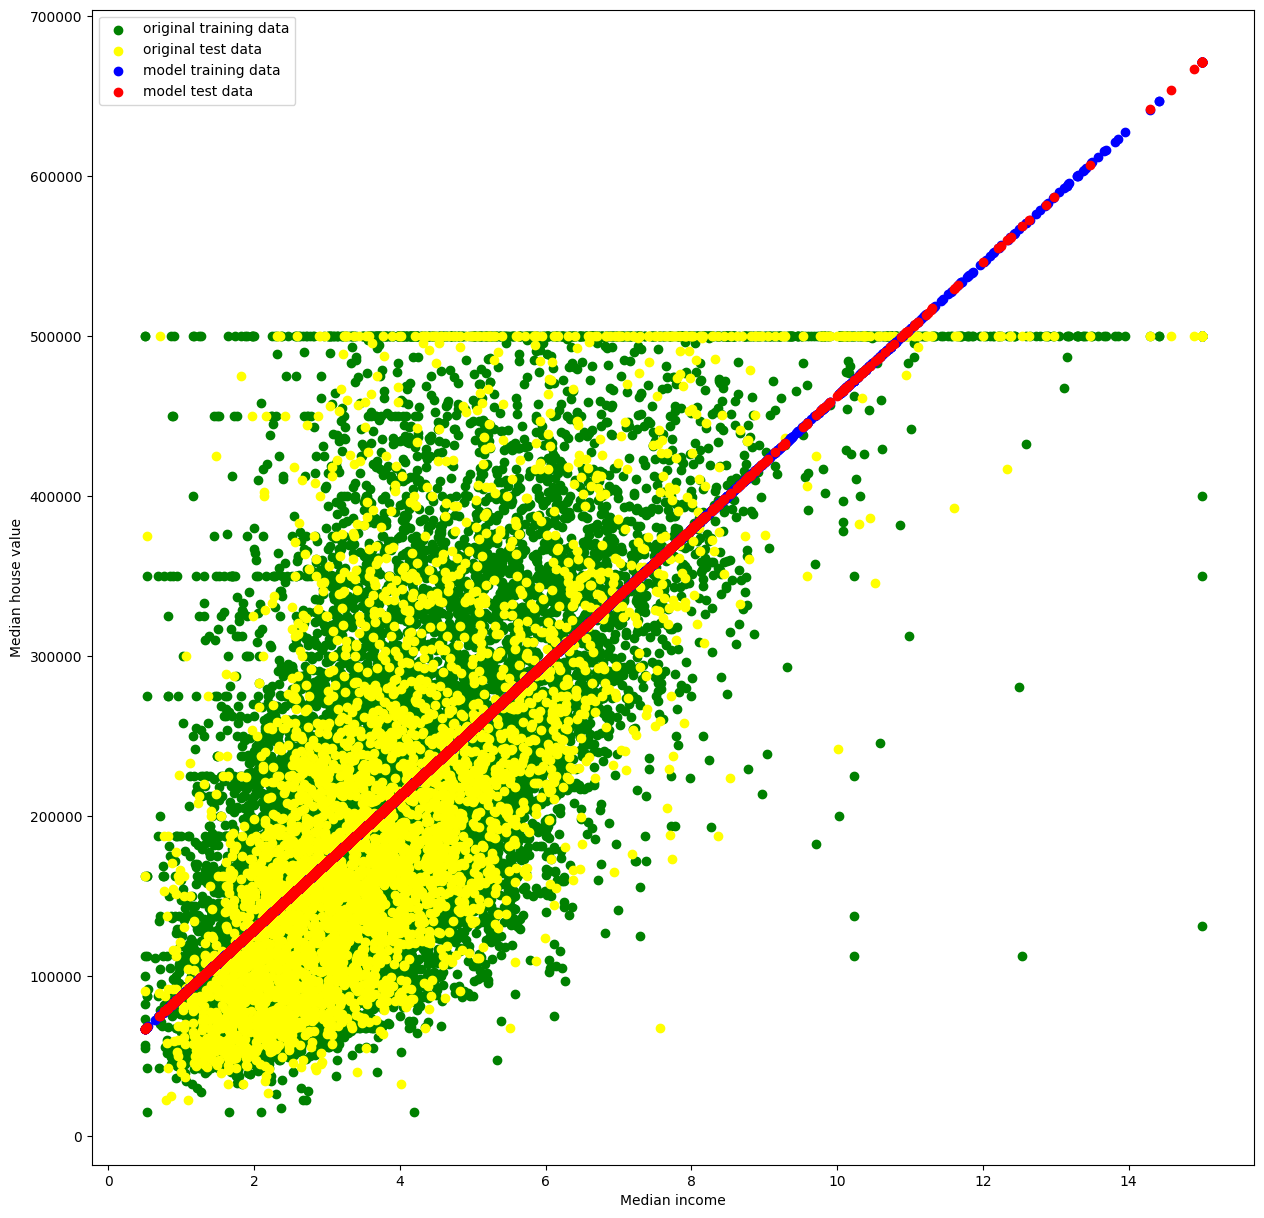

In [ ]:

plt.rc("figure", figsize=(12,12))
#plot original training data
plt.scatter(X_train, y_train, color="green", label="original training data")
#plot the original testing set
plt.scatter(X_test, y_test, color="yellow", label="original test data")
#plot the X_train and the model generated y
plt.scatter(X_train, y_model_train, color="blue", label="model training data")
#plot the X_test and the model generated y
plt.scatter(X_test, y_predicted, color="red", label="model test data")
plt.xlabel("Median income")
plt.ylabel("Median house value")
plt.legend()

# New Section